In [206]:
import prepare
import acquire #Import acquire data
import pandas as pd #Pandas
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree


# showing max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [241]:
telco_df = acquire.get_telco();telco_df.head()

,Unnamed: 0,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,Yes,2,65.6,593.3,No,One year,1,DSL,2,Mailed check
1,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,No,2,59.9,542.4,No,Month-to-month,1,DSL,2,Mailed check
2,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,Yes,1,73.9,280.85,Yes,Month-to-month,2,Fiber optic,1,Electronic check
3,3,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,Yes,1,98.0,1237.85,Yes,Month-to-month,2,Fiber optic,1,Electronic check
4,4,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,Yes,2,83.9,267.4,Yes,Month-to-month,2,Fiber optic,2,Mailed check


In [3]:
telco_df.drop(columns=['Unnamed: 0', 'internet_service_type_id.1', 'payment_type_id.1', 'customer_id'], inplace=True)

In [4]:
telco_df.head()

,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,Yes,2,65.6,593.3,No,One year,DSL,Mailed check
1,1,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,Yes,1,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,Yes,1,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,1,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,Yes,2,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [5]:
telco_df.total_charges.dtypes

dtype('O')

In [6]:
telco_df.total_charges.isna().value_counts()

False    7043
Name: total_charges, dtype: int64

In [7]:
telco_df['total_charges'] = (telco_df.total_charges + '0').astype('float')


In [8]:
telco_df.gender.replace({'gender': 'is_female'}, inplace=True)
telco_df.gender.replace({'Female': '1'}, inplace=True)
telco_df.gender.replace({'Male': '0'}, inplace=True)

In [9]:
telco_df.churn.replace({'No': '0'}, inplace=True)

In [242]:
clean_telco = prepare.prep_telco(telco_df)

In [ ]:
clean_telco.isna().sum()

In [ ]:
clean_telco.head()

In [243]:
train, validate, test = prepare.train_test_split(clean_telco, 'churn')

In [244]:
train.head()

,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type_id,payment_type_id,monthly_charges,total_charges,churn,month_to_month_contract,one_year_contract,two_year_contract,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_No,paperless_billing_Yes,IST_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1080,2,0,0,1,1,57,1,2,4,97.55,55980.00,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
3658,2,1,0,1,1,49,0,1,4,35.80,17820.00,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
5747,3,1,0,1,0,62,1,2,2,113.95,6891.40,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
2862,1,1,0,1,0,13,1,1,1,76.20,981.45,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0
3358,2,0,0,1,0,47,1,2,4,110.85,5275.80,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0


In [ ]:
train.columns

In [229]:
train.shape, validate.shape, test.shape

((3943, 45), (1409, 45), (1691, 45))

In [245]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [142]:
X_train = train.drop(columns='churn')
y_train = train.churn; 

In [61]:
train.columns

Index(['contract_type_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'internet_service_type_id',
       'payment_type_id', 'monthly_charges', 'total_charges', 'churn',
       'month_to_month_contract', 'one_year_contract', 'two_year_contract',
       'multiple_lines_No', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_movies_No',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'streaming_tv_No', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'paperless_billing_No', 'paperless_billing_Yes',
       'IST_DSL', 

In [62]:
X_train.isna().sum()

contract_type_id                          0
gender                                    0
senior_citizen                            0
partner                                   0
dependents                                0
tenure                                    0
phone_service                             0
internet_service_type_id                  0
payment_type_id                           0
monthly_charges                           0
total_charges                             0
month_to_month_contract                   0
one_year_contract                         0
two_year_contract                         0
multiple_lines_No                         0
multiple_lines_No phone service           0
multiple_lines_Yes                        0
online_security_No                        0
online_security_No internet service       0
online_security_Yes                       0
online_backup_No                          0
online_backup_No internet service         0
online_backup_Yes               

In [143]:
X_validate = validate.drop(columns='churn')
y_validate = validate.churn

In [144]:
X_test = test.drop(columns='churn')
y_test = test.churn

In [147]:
y_test.shape

(1691,)

# Assumptions
contract type + churn + tenure = the highest average of tenure for those that have churned is 2 year contracts.
internet service type + churn + tenure = the lowest average tenure is no internet service type for people who churn with children. 


TypeError: 'str' object is not callable

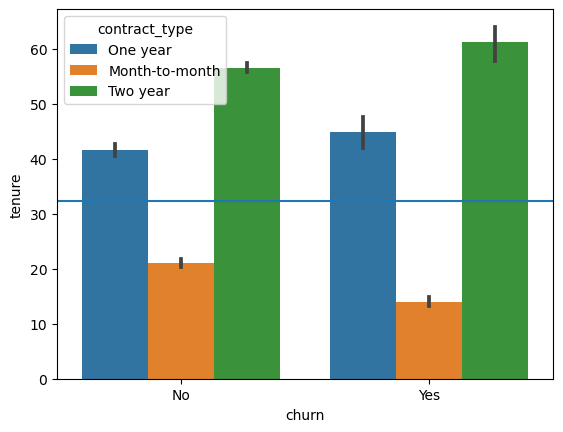

In [208]:
sns.barplot(x=telco_df.churn, y=telco_df.tenure, hue=telco_df.contract_type, data=telco_df)
churn_rate = telco_df.tenure.mean()
plt.axhline(churn_rate, label='tenure rate')
plt.title("Average month of tenure for churn on contract type")
plt.legend()
plt.show()

Takeaways
Is there a significant relationship between churn and contract type?


* $H_O$: There is no significant relationship between churn and contract type. 
* $H_a$: There is a significant relationship between churn and contract type.

In [ ]:
alpha = prepare.alpha()
null_hyp  = prepare.null_hyp_variables('churn', 'contract_type')
alt_hyp = prepare.alt_hyp_variables('churn', 'contract_type')


In [ ]:
observed = prepare.observed(telco_df, 'churn', telco_df, 'contract_type')

In [214]:
chi2, p, degf, expected = prepare.chi2_test(observed)

NameError: name 'observed' is not defined

In [213]:
prepare.chi_test_findings(p, alpha, null_hyp, alt_hyp)

NameError: name 'p' is not defined

Is there a relationship between internet service type and churn?

* $H_O$: Customers who churn are less likely to have fiber optic than other internet service pacakages. 
* $H_a$: Customers who churn are more likely to have fiber optic than other internet service pacakages.

In [212]:
import seaborn as sns
plt.title("aveage monthly charges for churn by internet service type")
sns.set_theme(style="ticks")
sns.swarmplot(data=telco_df, x="monthly_charges", y="churn", hue="internet_service_type")
plt.show()

TypeError: 'str' object is not callable

In [ ]:
dsl_churn = telco_df.loc[(telco_df['churn'] == 'Yes') & (telco_df['internet_service_type'] == 'DSL' )]

In [ ]:
dsl_df = dsl_churn[['monthly_charges', 'churn', 'internet_service_type']]

In [ ]:
alpha = prepare.alpha()

In [ ]:
null_hyp =  print(f'Customers who have fiber optics are less than likely to churn')

In [ ]:
alt_hyp = print(f'customers who have fiber optics are more than likely to churn')

In [ ]:
observed= prepare.observed(train, 'churn', train, 'internet_service_type_Fiber optic') #FO IST

In [174]:
chi2, p , degf, expected = prepare.chi2_test(observed)

NameError: name 'observed' is not defined

In [173]:
prepare.chi_test_findings(p, alpha, null_hyp, alt_hyp)

NameError: name 'p' is not defined

In [178]:
columns_y = telco_df['payment_type']

TypeError: 'str' object is not callable

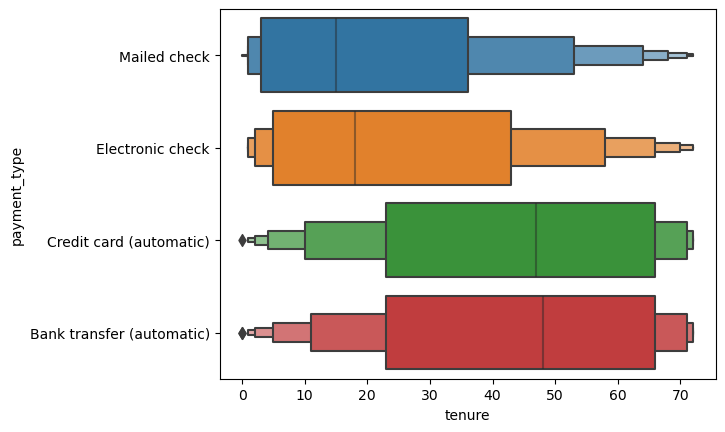

In [203]:
sns.boxenplot(data=telco_df, x=telco_df['tenure'], y=columns_y, showfliers=True)
plt.title("Average tenure of customers by payment type")
plt.show()

In [ ]:
stats.f_oneway()

In [189]:
column_x= telco_df['payment_type']

TypeError: 'str' object is not callable

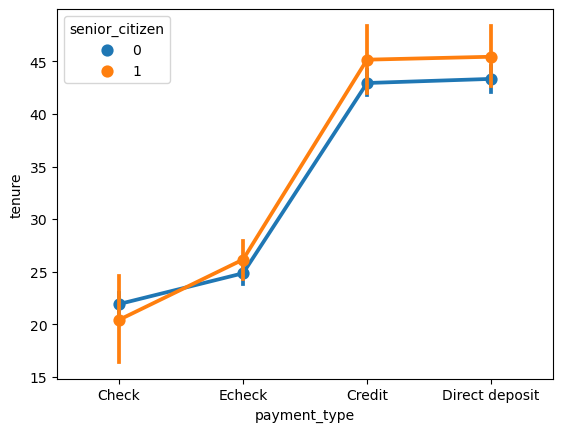

In [204]:
sns.pointplot(data=telco_df, x=column_x, y=telco_df.tenure, hue=telco_df.senior_citizen, linestyle=["-", "--"])
plt.xticks([0, 1, 2, 3], ['Check', 'Echeck', 'Credit', 'Direct deposit'])
plt.title("Average Tenure of Payment Type By Senior Citizen")
plt.show()

In [216]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [246]:
train['baseline'] = 0

In [247]:
train.baseline

1080    0
3658    0
5747    0
2862    0
3358    0
6464    0
2927    0
3555    0
1754    0
5540    0
536     0
6948    0
1699    0
277     0
4304    0
7004    0
280     0
5408    0
6166    0
6873    0
3816    0
1852    0
2282    0
3707    0
3749    0
5009    0
3380    0
1127    0
5292    0
1833    0
1086    0
294     0
1364    0
2654    0
2152    0
5367    0
3239    0
5987    0
2782    0
4104    0
85      0
1156    0
1141    0
100     0
3906    0
1419    0
1844    0
6719    0
4962    0
413     0
407     0
6479    0
896     0
936     0
1181    0
6061    0
2649    0
4874    0
1454    0
6554    0
172     0
4908    0
4310    0
784     0
6506    0
1406    0
6906    0
1461    0
4944    0
2898    0
2614    0
2929    0
1845    0
2365    0
446     0
1111    0
1099    0
3463    0
6169    0
2868    0
962     0
1525    0
4319    0
3266    0
3710    0
4563    0
5057    0
2555    0
4955    0
2730    0
3550    0
1808    0
6834    0
3873    0
5757    0
5050    0
1685    0
88      0
3417    0
5968    0


In [248]:
(train.baseline == train.churn).mean()

0.7347197565305605

In [251]:
confusion_matrix(train.churn, train.baseline)

array([[2897,    0],
       [1046,    0]])

In [65]:
rfc = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=120)

In [66]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=120)

In [67]:
rfc.score(X_test, y_test)

0.8042578356002366

In [68]:
print(rfc.feature_importances_)

[0.11802424 0.00131554 0.00296744 0.00417894 0.00500349 0.1220187
 0.00260982 0.02840287 0.04136195 0.05472925 0.0723931  0.13624296
 0.01998363 0.05215546 0.00332991 0.00149778 0.00357741 0.05676204
 0.00750057 0.00839952 0.01873124 0.00395022 0.00417687 0.00313437
 0.00801909 0.00158807 0.04177335 0.00730769 0.0074292  0.00151224
 0.00488651 0.00228445 0.00252118 0.00950325 0.00234776 0.01051129
 0.01093635 0.01406433 0.0607428  0.00750274 0.0014811  0.00168939
 0.02948366 0.00196821]


In [254]:
y_pred =rfc.predict(X_train)

In [255]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [256]:
y_pred_proba = rfc.predict_proba(X_train)
y_pred_proba

array([[0.84401586, 0.15598414],
       [0.92502167, 0.07497833],
       [0.90918382, 0.09081618],
       ...,
       [0.56343704, 0.43656296],
       [0.96123709, 0.03876291],
       [0.89529023, 0.10470977]])

In [257]:
print('Accuracy of random forest classifier on training set: {:.2f}'# Accuracy
     .format(rfc.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.81


In [258]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[2681,  216],
       [ 548,  498]])

In [259]:
print('Accuracy of random forest classifier on training set: {:.2f}'# Accuracy
     .format(rfc.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.81


Text(47.25, 0.5, 'Actual')

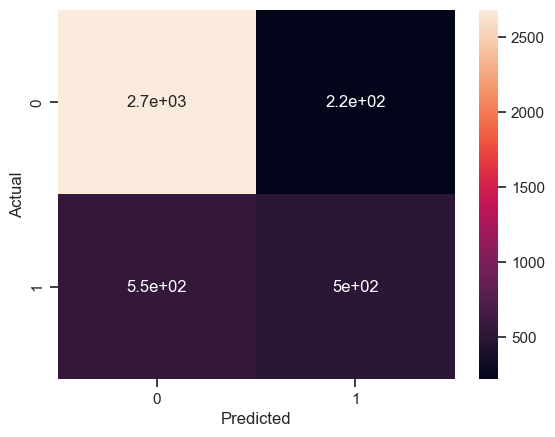

In [260]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [261]:
tp_train = confusion_matrix(y_train, y_pred)[0][0]
fp_train = confusion_matrix(y_train, y_pred)[0][1]
fn_train = confusion_matrix(y_train, y_pred)[1][0]
tn_train = confusion_matrix(y_train, y_pred)[1][1]

In [262]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2897
           1       0.70      0.48      0.57      1046

    accuracy                           0.81      3943
   macro avg       0.76      0.70      0.72      3943
weighted avg       0.80      0.81      0.79      3943



In [263]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rfc.score(X_validate, y_validate)))


Accuracy of random forest classifier on test set: 0.81


In [264]:
accuracy = (tp_train + tn_train)/(tn_train + fp_train + fn_train+ tp_train)
print(f"Accuracy: {accuracy}")

true_positive_rate = tp_train/(tp_train + fn_train)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = fp_train/(fp_train + tn_train)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = tn_train/(tn_train + fp_train)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = fn_train/(fn_train + tp_train)
print(f"False Negative Rate: {false_negative_rate}")

precision = tp_train/(tp_train + fp_train)
print(f"Precision: {precision}")

recall = tp_train/(tp_train + fn_train)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = tp_train + fn_train
print(f"Support (0): {support_pos}")

support_neg = fp_train + tn_train
print(f"Support (1): {support_neg}")

Accuracy: 0.8062389043875222
True Positive Rate: 0.8302880148652834
False Positive Rate: 0.3025210084033613
True Negative Rate: 0.6974789915966386
False Negative Rate: 0.16971198513471664
Precision: 0.9254401104590956
Recall: 0.8302880148652834
F1 Score: 0.8752856676460987
Support (0): 3229
Support (1): 714


In [265]:
#create an empty list to append results to
metrics = []

for j in range (1, 10):
    for i in range(2, 10):
        rf = RandomForestClassifier(max_depth=i, 
                                    min_samples_leaf=j, 
                                    random_state=123)

        # Fit the model (on train and only train)
        rf = rf.fit(X_train, y_train)

        # We'll evaluate the model's performance on train, first
        in_sample_accuracy = rf.score(X_train, y_train)
    
        out_of_sample_accuracy = rf.score(X_validate, y_validate)

        output = {
            "min_samples_per_leaf": j,
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
        }
    
        metrics.append(output)

In [266]:
metrics

[{'min_samples_per_leaf': 1,
  'max_depth': 2,
  'train_accuracy': 0.7600811564798376,
  'validate_accuracy': 0.7572746628814763},
 {'min_samples_per_leaf': 1,
  'max_depth': 3,
  'train_accuracy': 0.7862033984275932,
  'validate_accuracy': 0.7906316536550745},
 {'min_samples_per_leaf': 1,
  'max_depth': 4,
  'train_accuracy': 0.7963479584073041,
  'validate_accuracy': 0.7955997161107168},
 {'min_samples_per_leaf': 1,
  'max_depth': 5,
  'train_accuracy': 0.8059852903880295,
  'validate_accuracy': 0.8062455642299503},
 {'min_samples_per_leaf': 1,
  'max_depth': 6,
  'train_accuracy': 0.8168906923662186,
  'validate_accuracy': 0.8041163946061036},
 {'min_samples_per_leaf': 1,
  'max_depth': 7,
  'train_accuracy': 0.826528024346944,
  'validate_accuracy': 0.8041163946061036},
 {'min_samples_per_leaf': 1,
  'max_depth': 8,
  'train_accuracy': 0.8417448643165103,
  'validate_accuracy': 0.8048261178140526},
 {'min_samples_per_leaf': 1,
  'max_depth': 9,
  'train_accuracy': 0.866852650266294

In [268]:
# create a df from metrics
df = pd.DataFrame(metrics)

# compute difference in accuracy between train and validate
df["difference"] = df.train_accuracy - df.validate_accuracy

# sort the df by validate_accuracy (descending) and take top 10
df = df.sort_values(by=['validate_accuracy'], ascending=False).head(10)

In [282]:
acc = df.iloc[0][2:4]
train_acc = acc.index[0]
validate_acc = acc.index[1]
train_model = acc[0]
validate_model = acc[1]

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=100)

In [ ]:
dtc.fit(X_train, y_train)

In [ ]:
y_pred = dtc.predict(X_train)

In [ ]:
plt.figure(figsize=(12,7)) 
plot_tree(dtc, feature_names=X_train.columns, class_names=np.array(dtc.classes_).astype('str').tolist(),rounded=True, fontsize=10)
plt.show()

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dtc.score(X_train,y_train)))

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
report = classification_report(y_train, y_pred, output_dict=True) # returning out as dictionary
report

In [ ]:
print("Tree of 1 depth")
pd.DataFrame(report).T

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

In [ ]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

In [ ]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

In [ ]:
tree2 = DecisionTreeClassifier(max_depth=4)

In [ ]:
tree2.fit(X_train, y_train)

In [ ]:
for i in range(1, 21):
    # Make the model
    trees = DecisionTreeClassifier(max_depth=i, random_state=123)
    trees = trees.fit(X_train, y_train)
    
    y_preds = trees.predict(X_train)
    report = classification_report(y_train, y_preds, output_dict=True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()

In [ ]:
metrics = []

for i in range (1, 25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_validate, y_validate)
    
    output = {"max_depth": i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [283]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
27,4,5,0.804971,0.809084,-0.004114
69,9,7,0.819934,0.808375,0.011559
13,2,7,0.823738,0.808375,0.015364
22,3,8,0.834897,0.808375,0.026523
35,5,5,0.804717,0.807665,-0.002948
67,9,5,0.804971,0.807665,-0.002694
11,2,5,0.806746,0.807665,-0.000919
62,8,8,0.828557,0.807665,0.020892
7,1,9,0.866853,0.807665,0.059188
61,8,7,0.820441,0.806246,0.014196


In [285]:
df.iloc[0][2:4]

train_accuracy       0.804971
validate_accuracy    0.809084
Name: 27, dtype: float64

In [ ]:
train['baseline_predictions']= 0

In [ ]:
from sklearn.linear_model import LogisticRegression

seed = 50

# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=100, solver='lbfgs')


logit.fit(X_train, y_train)

In [ ]:
logit.classes_
len(logit.coef_[0])

len(X_train.columns)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

In [ ]:
y_pred = logit.predict(X_train)

y_pred_proba = logit.predict_proba(X_train)

In [ ]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))


print(confusion_matrix(y_train, y_pred))


print(classification_report(y_train, y_pred))


In [ ]:
logit2 = LogisticRegression(class_weight={0:1, 1:99}, random_state=123, solver='liblinear')

logit2.fit(X_train, y_train)

logit2.coef_

In [ ]:
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

In [ ]:
y_pred2 = logit2.predict(X_train)


y_pred_proba2 = logit2.predict_proba(X_train)


print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))


print(confusion_matrix(y_train, y_pred2))

In [ ]:
# make predictions

y_pred1 = logit.predict(X_validate)
y_pred2 = logit2.predict(X_validate)


print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 1
print(classification_report(y_validate, y_pred1))

print("Model 2: solver = lbfgs, c = .1")

# accuracy of model 2
print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

# confusion matrix of model 2
print(confusion_matrix(y_validate, y_pred2))

# classification report of model 2
print(classification_report(y_validate, y_pred2))


In [ ]:
y_pred = logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)

print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred)


# Data Exploration

In [110]:
rfc_test = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=120)

In [111]:
rfc_test.fit(X_test, y_test)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=120)

In [112]:
rfc_test.score(X_test, y_test)

0.8279124778237729

In [113]:
print(rfc_test.feature_importances_)

[0.10839234 0.00154408 0.00437486 0.00372457 0.00665635 0.13880318
 0.00209018 0.01933412 0.04718182 0.0650247  0.06883083 0.1369355
 0.02344759 0.02504192 0.00527373 0.00227897 0.00356192 0.04692857
 0.00496359 0.00930366 0.01915353 0.00320281 0.00441073 0.01030085
 0.01053436 0.00262064 0.07129807 0.00787185 0.01267596 0.00564148
 0.00717086 0.00492013 0.00357124 0.00673174 0.00320489 0.00307328
 0.00556781 0.00988085 0.03508641 0.00653593 0.00213522 0.00289334
 0.03568499 0.00214055]


In [114]:
y_pred =rfc_test.predict(X_test)

In [115]:
y_pred # prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_proba = rfc_test.predict_proba(X_test)
y_pred_proba # probability

In [120]:
prob_pred = pd.DataFrame(y_pred_proba); prob_pred

,0,1
0,0.912598,0.087402
1,0.671665,0.328335
2,0.683618,0.316382
3,0.796575,0.203425
4,0.985176,0.014824
5,0.956566,0.043434
6,0.940272,0.059728
7,0.855420,0.144580
8,0.306926,0.693074
9,0.661802,0.338198


In [117]:
print('Accuracy of random forest classifier on training set: {:.2f}'# Accuracy
     .format(rfc_test.score(X_test, y_test)))

Accuracy of random forest classifier on training set: 0.83


In [102]:
output = {'Customer_id': test['customer_id'] }

In [149]:
cust_id= pd.DataFrame(output); cust_id

,Customer_id
4234,5975-BAICR
6534,9278-VZKCD
383,0567-GGCAC
3237,4634-JLRJT
406,0603-TPMIB
4269,6013-BHCAW
4754,6693-DJWTY
3713,5223-UZAVK
4749,6689-TCZHQ
4468,6300-BWMJX


In [150]:
cust_id.reset_index(inplace=True)

In [131]:
cust_id.drop('index', axis=1, inplace=True)

In [ ]:
pred_csv = pd.concat((cust_id, prob_pred), axis=1); pred_csv

In [157]:
pred_csv.rename(columns={0: 'Probability', 1: 'Prediction'}, inplace=True); pred_csv

,Customer_id,Probability,Prediction
0,5975-BAICR,0.912598,0.087402
1,9278-VZKCD,0.671665,0.328335
2,0567-GGCAC,0.683618,0.316382
3,4634-JLRJT,0.796575,0.203425
4,0603-TPMIB,0.985176,0.014824
5,6013-BHCAW,0.956566,0.043434
6,6693-DJWTY,0.940272,0.059728
7,5223-UZAVK,0.855420,0.144580
8,6689-TCZHQ,0.306926,0.693074
9,6300-BWMJX,0.661802,0.338198


In [172]:
pred_csv.to_csv("Prediction.csv")

In [97]:
csv_model= prepare.prep_telco1(telco_df)

In [98]:
train, validate, test = prepare.train_test_split(csv_model, 'churn')

In [ ]:
X_test.shape

In [ ]:
test.head()

In [ ]:
telco_df.head()


#### Data models to use
* Decision Tree

In [293]:
df = acquire.get_telco()
df = prepare.prep_telco(df)
train, validate, test = prepare.train_test_split(df, 'churn')
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.create_train_validate_test_samples(train, validate, test)
dtc = DecisionTreeClassifier(max_depth=3, random_state=100)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_train)
tree2 = DecisionTreeClassifier(max_depth=4)
tree2.fit(X_train, y_train)
    
metrics = []
for i in range (1, 25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_validate, y_validate)
    
    output = {"max_depth": i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
    
    metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df['difference'] = df.train_accuracy - df.validate_accuracy
    df
    acc = df.iloc[0][1:3]
    train_acc = acc.index[0]
    validate_acc = acc.index[1]
    train_model = acc[0]
    validate_model = acc[1]
a = print(f'{train_acc}: {train_model}')
b = print(f'{validate_acc}: {validate_model}')

train_accuracy: 0.7347197565305605
validate_accuracy: 0.7345635202271115
